This notebook shows how to generate a synthetic District Heating Network (DHN) using the developed models.

A graph generator generates a random graph mimicking DHN topology and a heating model generates demands for the substation nodes.

#### Loading python packages

In [1]:
# Packages

import os
import networkx as nx
import sys
import os
from src.graph_generator import GraphDHNGenerator
from src.graph_generator_params import GraphGeneratorParameters
from src.dhn_topology import DHNTopology
from src.demands_model_dpe import generate_substation_demands

import matplotlib.pyplot as plt
import matplotlib as mpt
from cycler import cycler

mpt.rcParams['lines.linewidth'] = 1.4
mpt.rcParams['font.size'] = 12
mpt.rcParams['axes.prop_cycle'] = cycler(color=['r', 'g', 'b', 'y'])
plt.style.use('ggplot')


#### Synthetic DHN generator

We define control parameters including the number of connected regions, number of degree max per node, the number of nodes per regions, and the *target ratio* between number of edges and number of nodes. 
Other control parameters may be defined. For more detail, the reader is encouraged to take a look at the class **GraphGeneratorParameters**.


The target ratio has been introduced to influence the *presence of loops* inside the DHN. From expertise point of view, DHNs have low mean nodes degree and have few or none loops.

In [2]:
params = GraphGeneratorParameters(target_ratio=1.1, nb_regions=2, nb_nodes_per_region=20, E_rp=0.5, E_ee=0.1, edge_weight_mean=1.0, edge_weight_std=0.1, nb_producers_to_reach=2)

Then, we create a random graph generator object (**GraphDHNGenerator**) which uses the control parameters as properties.

In [3]:
generator = GraphDHNGenerator(params)

Now, we have everything to generate a random DHN. To do so, we call a function of the class **GraphDHNGenerator**.

Generating each region ...
	Region 1
	Region 2
Loop --> adding edges between regions
	 --> finished
Found cycles = []
DHN-based graph generated !


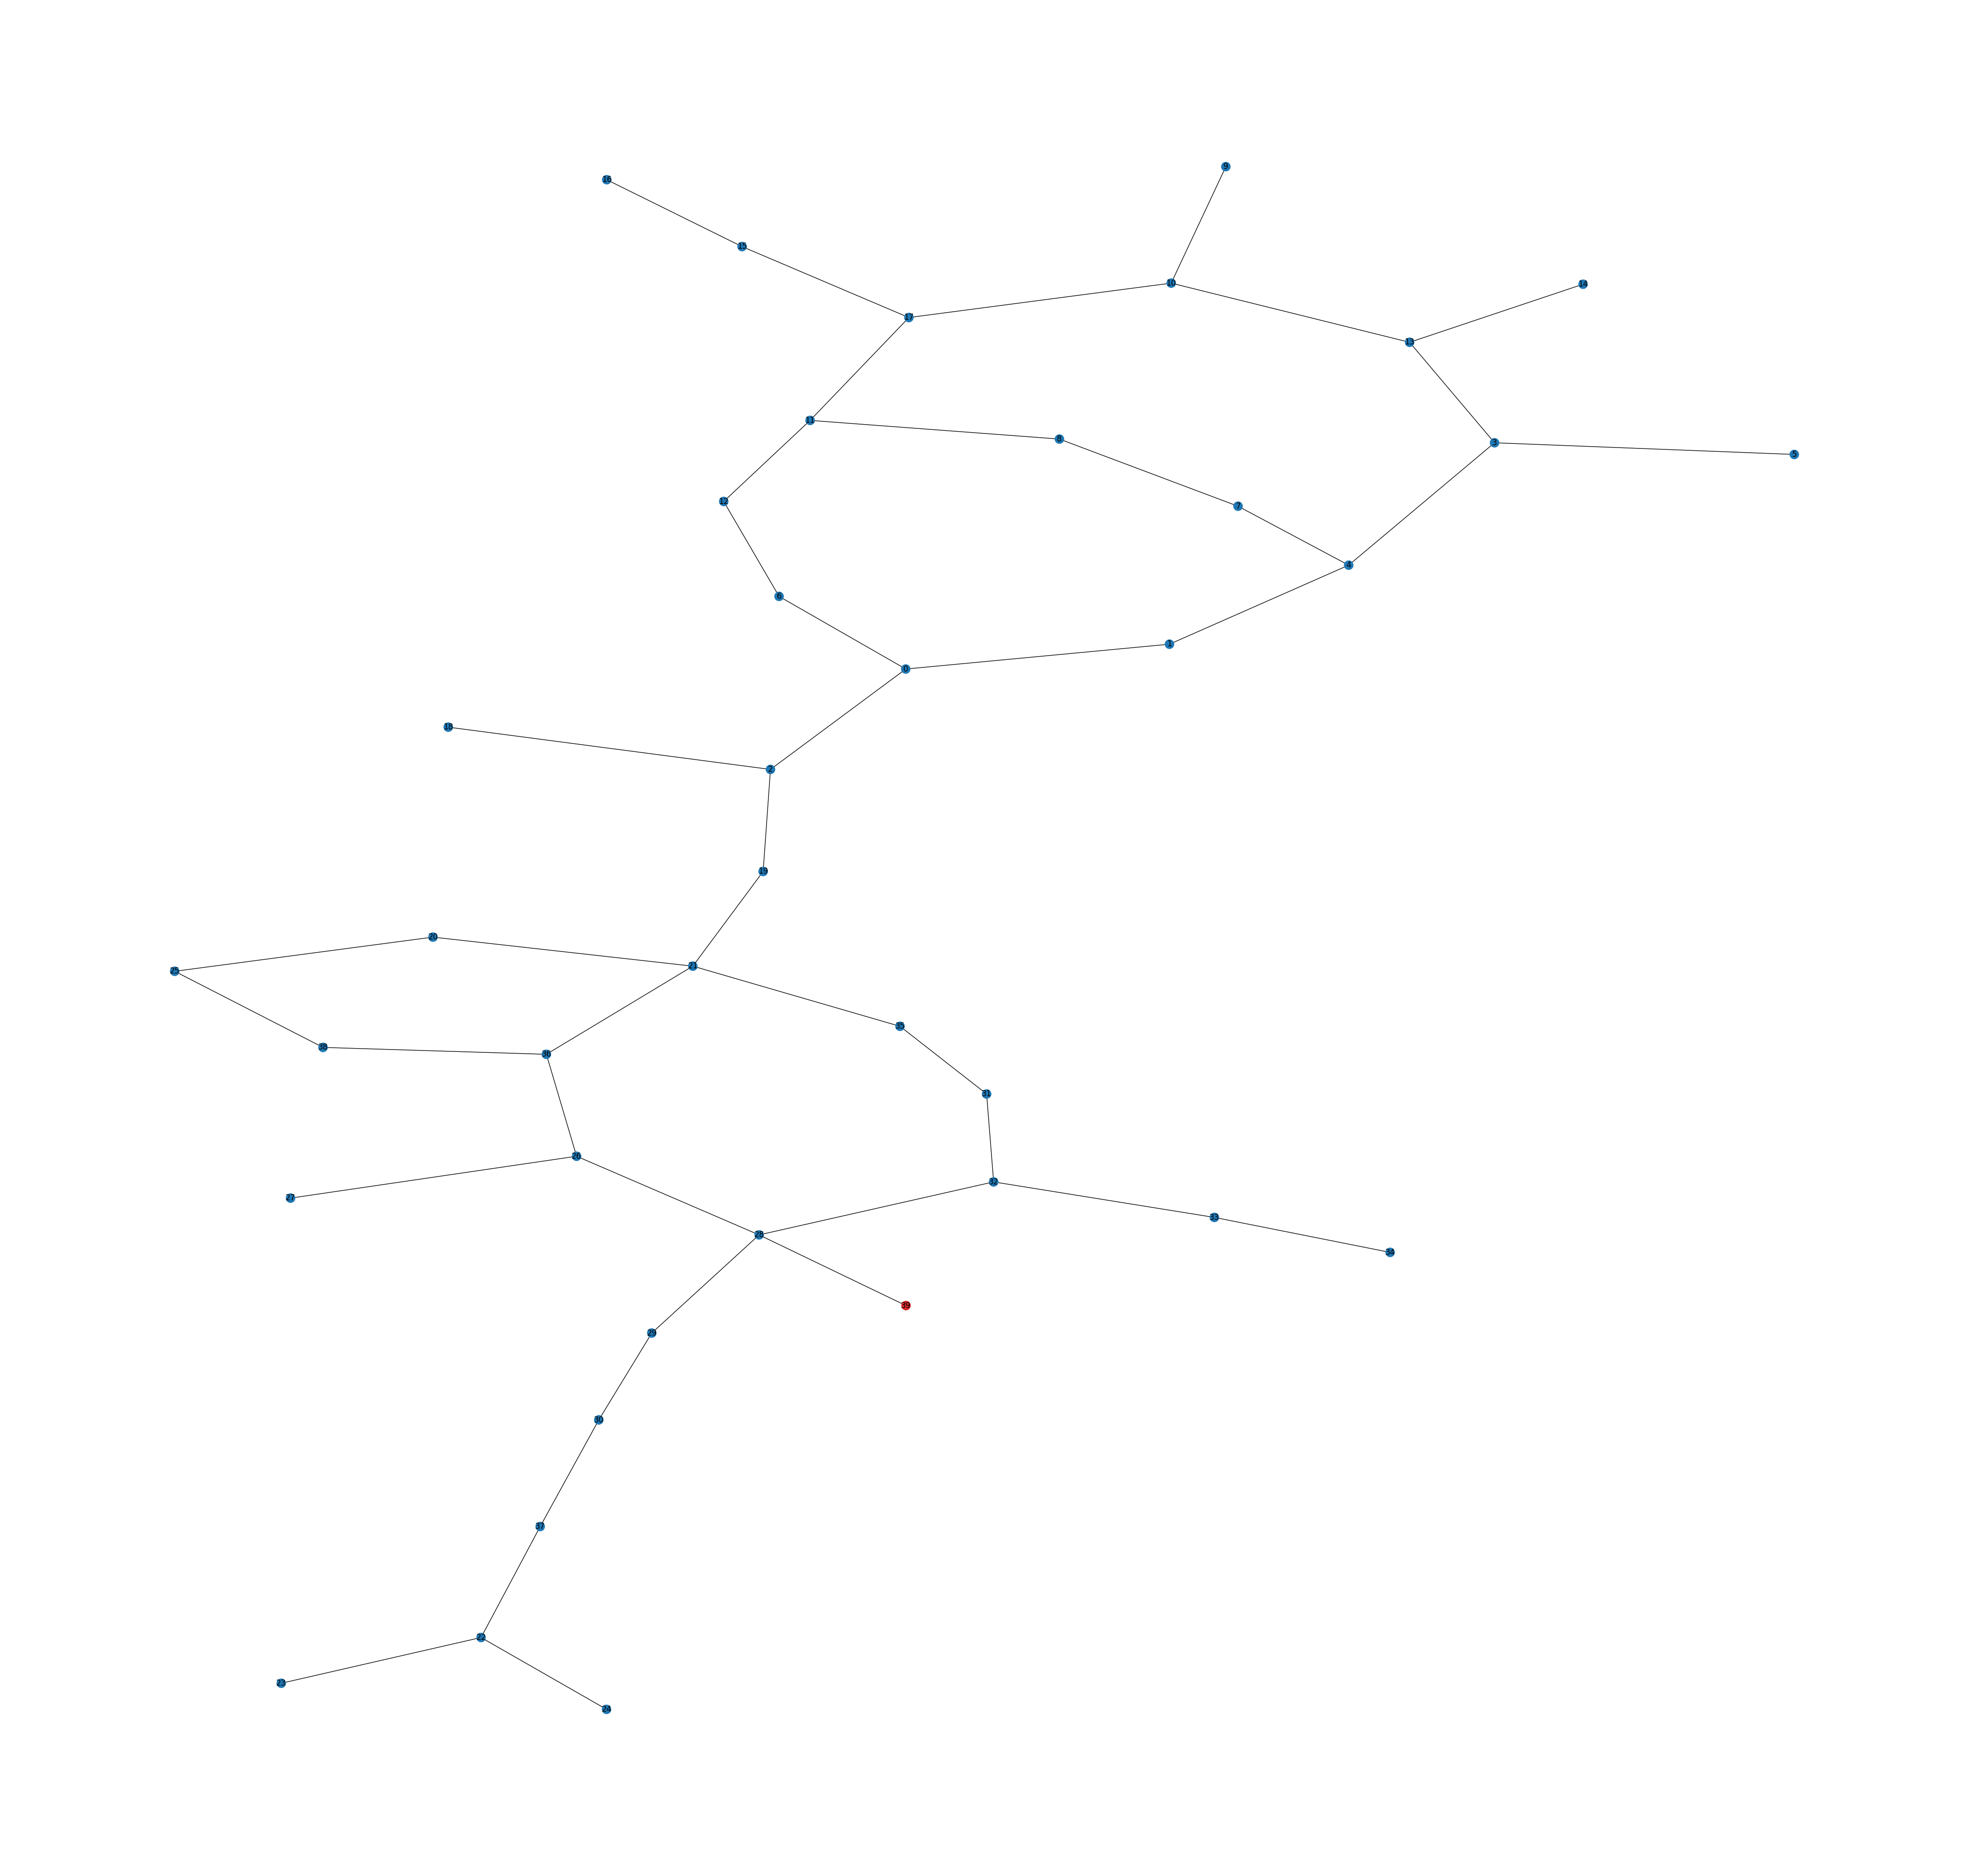

Producers are = [39, 23, 17]
Number of nodes are = 40


In [4]:
generator.generate_random_connected_dhn()

# We shown the number of producers and the number of nodes of the DHN generated.
print(f'Producers are = {generator.producer_indices}')
print(f'Number of nodes are = {len(generator.node_positions)}')

#### DHN topology file

From the generated DHN, we generate a topology file in excel format containing the information of the substation nodes, the pipes and the heating demands of the nodes.

The following cell may take few minutes. 

In [6]:
topology_dhn = DHNTopology(generator, 
                           graph_folder_name = 'DHN_test',
                           heating_demand_model=2) # If 1 use heating law, 2 use DPE French data

In [7]:
topology_dhn._loads

,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
0,40.786295,25.747155,17.492819,53.415320,11.925296,44.481221,12.073458,38.273813,117.493813,22.120448,...,43.697750,95.272962,81.534484,92.018195,10.245488,20.330559,26.732002,8.183978,31.320209,19.785172
1,36.836578,21.717315,15.011795,46.720866,10.963315,41.016437,10.635028,34.280970,101.458527,20.576550,...,35.733725,85.617264,66.111447,82.347384,8.710446,19.156398,23.665948,7.506844,27.327919,16.444490
2,37.835745,21.574538,15.035991,47.435141,11.381308,42.339023,10.833161,34.954637,102.646791,21.296548,...,35.026974,88.651876,64.825407,84.732224,8.682220,19.943620,24.204144,7.717705,27.679594,16.237987
3,41.749936,23.738521,16.548750,52.443140,12.595385,46.569221,11.979039,38.440996,113.699965,23.405828,...,38.585025,98.700761,71.693700,93.966165,9.550620,21.933550,26.807911,8.474556,30.566525,17.880305
4,49.817142,30.318814,20.756692,64.778679,14.817095,54.220503,14.693290,46.081602,142.580052,26.989122,...,51.017786,119.545708,95.983472,113.789277,12.092503,24.993733,32.771174,9.899066,37.806583,23.218125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,78.929879,50.994906,34.238910,109.012790,23.682034,80.443553,24.559052,71.159399,248.005188,39.139735,...,90.059460,208.635683,176.722307,192.047979,20.085631,35.844922,55.322636,14.504117,63.098365,40.052059
8755,77.108796,50.066556,33.594475,106.354384,23.039356,78.884734,23.950078,69.835039,241.553342,38.418736,...,88.354151,201.815162,172.715080,186.577805,19.723309,35.140596,53.843374,14.258894,61.645059,39.299151
8756,70.710689,45.897806,30.824125,96.995519,21.042475,72.926091,21.845610,64.400030,219.486507,35.608864,...,80.680029,182.291840,156.782380,169.537075,18.099553,32.567682,48.997217,13.221205,56.317357,35.946099
8757,58.502430,39.033559,26.131545,79.474229,16.970962,61.786266,17.857110,54.750732,177.853483,30.355273,...,68.245025,141.377609,129.532775,135.340874,15.412029,27.574120,39.554082,11.365750,46.540904,30.446301


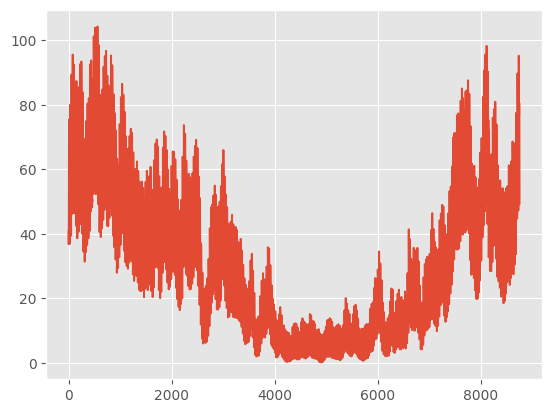

In [9]:
plt.plot(topology_dhn._loads.loc[:,1])

### Generating 100 synthetic DHNs

Here, we generate 100 synthetic DHNs. Note that this code may take several minutes. 

Generating each region ...
	Region 1
	Region 2
	Region 3
Loop --> adding edges between regions
	 --> finished
cycle found [(15, 14), (14, 18), (18, 15)]
cycle found [(14, 15), (15, 18), (18, 14)]
cycle found [(18, 14), (14, 15), (15, 18)]
cycle found [(26, 25), (25, 37), (37, 26)]
cycle found [(25, 26), (26, 37), (37, 25)]
cycle found [(37, 25), (25, 26), (26, 37)]
Found cycles = [[(15, 14), (14, 18), (18, 15)], [(14, 15), (15, 18), (18, 14)], [(18, 14), (14, 15), (15, 18)], [(26, 25), (25, 37), (37, 26)], [(25, 26), (26, 37), (37, 25)], [(37, 25), (25, 26), (26, 37)]]
Treating the cycle [(15, 14), (14, 18), (18, 15)]
Edge (15,14) removed
Treating the cycle [(14, 15), (15, 18), (18, 14)]
Treating the cycle [(18, 14), (14, 15), (15, 18)]
Treating the cycle [(26, 25), (25, 37), (37, 26)]
Edge (26,25) removed
Treating the cycle [(25, 26), (26, 37), (37, 25)]
Treating the cycle [(37, 25), (25, 26), (26, 37)]
DHN-based graph generated !


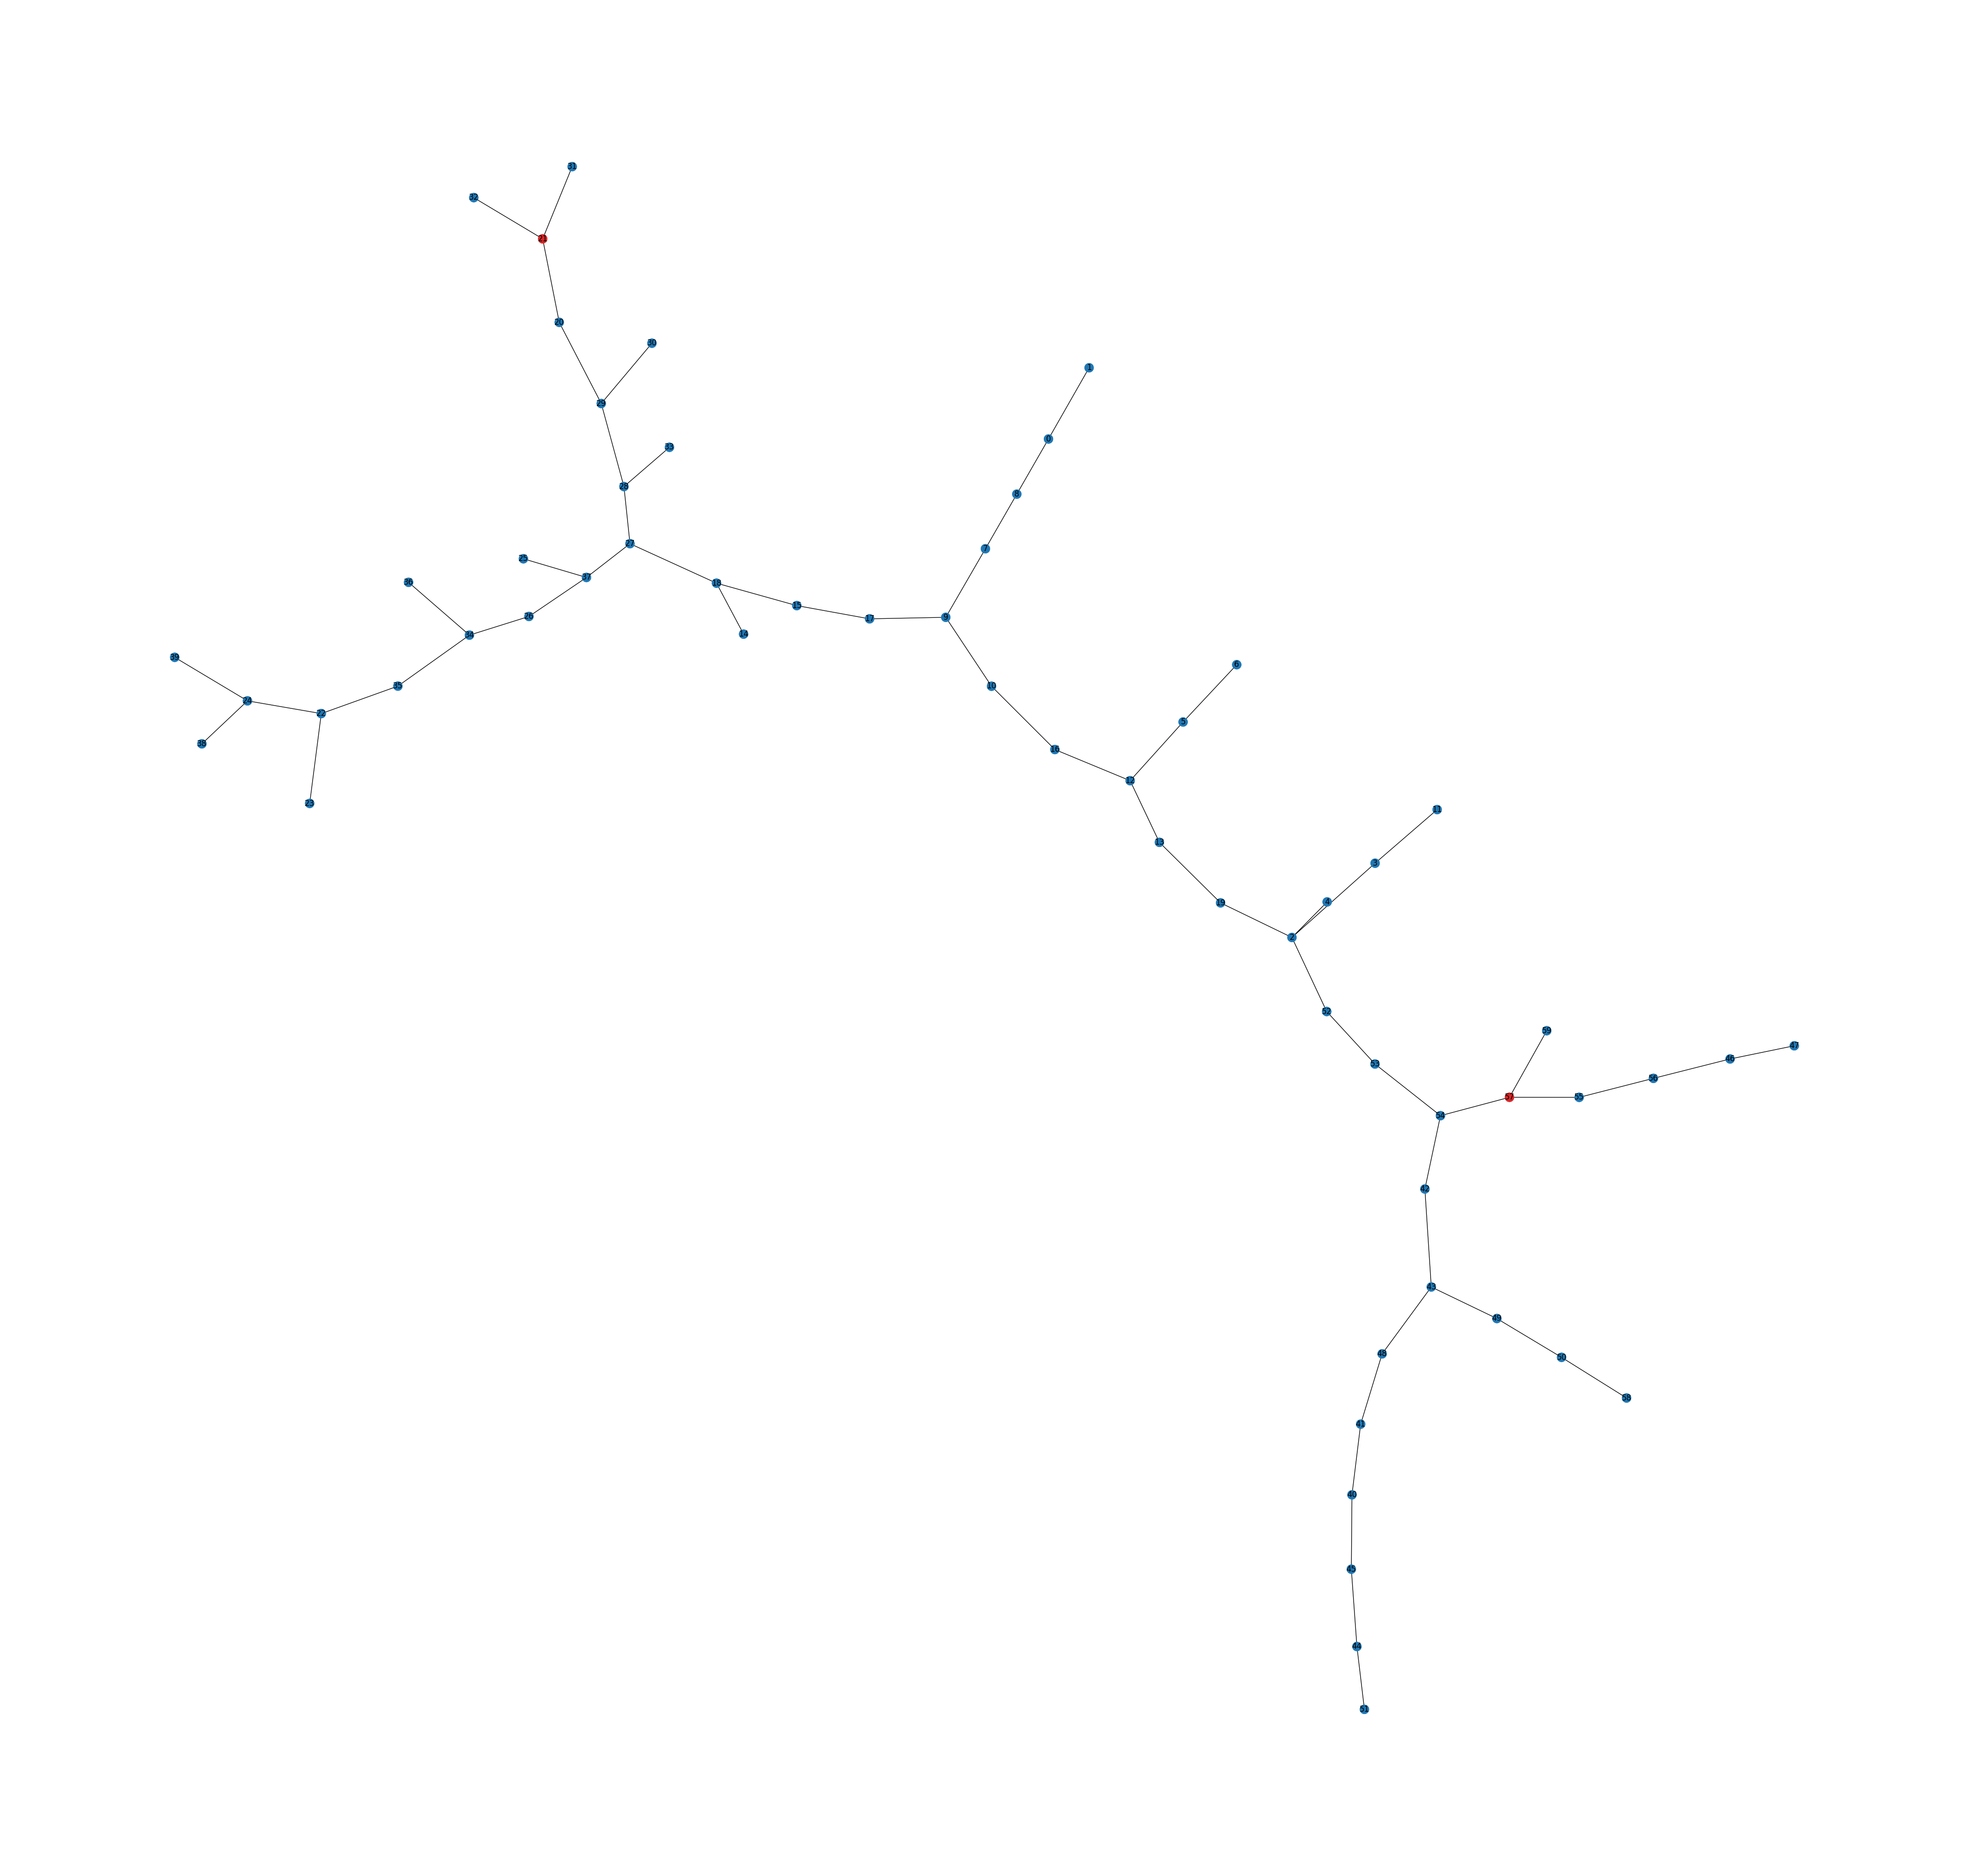

In [3]:
import random

for i in [21]:
    nb_regions = random.randint(2, 3) # Between 2 and 5 regions
    nb_nodes_per_region = random.randint(20, 41) # Between 10 to 40 nodes per region
    nb_producers_to_reach = random.randint(1, nb_regions) # Between 1 to the number of regions
    params = GraphGeneratorParameters(target_ratio=1.01, nb_regions=nb_regions, nb_nodes_per_region=nb_nodes_per_region, E_rp=0.5, E_ee=0.1, edge_weight_mean=1.0, edge_weight_std=0.1, nb_producers_to_reach=nb_producers_to_reach)
    generator = GraphDHNGenerator(params)
    generator.generate_random_connected_dhn()
    topology_dhn = DHNTopology(generator, 
                               graph_folder_name = f'synthetic_dhn_{i}',
                                heating_demand_model=2) # If 1 use heating law, 2 use DPE French data

#### Reviewing demands

We regenerate here the demands topology files.

In [3]:

for id_ in range(22,47):
    topology_file = os.path.join('Synthetic_DHNs', f'synthetic_dhn_{id_}', 'topology.xlsx')
    if os.path.isfile(topology_file):
        try:
            print(f'Treating network {id_}')
            generator = GraphDHNGenerator()
            generator.read_generated_graph(topology_file, plot_graph=False)
            topology_dhn = DHNTopology(generator, 
                                    graph_folder_name = f'synthetic_dhn_{id_}',
                                    heating_demand_model=2)
        except Exception as ex:
            print(ex)

Treating network 22
Treating network 23
Treating network 24
Treating network 25
Treating network 26
Treating network 27
Treating network 28
Treating network 29
Treating network 30
Treating network 31
Treating network 32
Treating network 33
Treating network 34
Treating network 35
Treating network 36
Treating network 37
Treating network 38
Treating network 39
Treating network 40
Treating network 41
Treating network 42
Treating network 43
Treating network 44
Treating network 45
Treating network 46
